# Praca domowa nr 8

- Dane to tej pracy domowej to lista top 5000 albumów muzycznych wg portalu [rateyourmusic.com](https://rateyourmusic.com). Dataset wraz z opisem można znaleźć na [Kaggle'u](https://www.kaggle.com/datasets/michaelbryantds/top-5000-albums-of-all-time-rateyourmusiccom). 
- Dane znajdują się też w katalogu z pracą domową - nazwa pliku to `rym_top5000.csv`.  

## Zadanie 1 - `numpy` + `pandas` (2 pkt)
Używając funkcji z pakietów `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o albumach muzycznych.

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("rym_top5000.csv")

In [5]:
df.head()

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
0,1.0,OK Computer,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531
1,2.0,Wish You Were Here,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983
2,3.0,In the Court of the Crimson King,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870
3,4.0,Kid A,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734
4,5.0,To Pimp a Butterfly,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379


#### Jacy artyści z ponad 5 albumami na liście mają największą medianę ocen dla swoich albumów? Podaj top 10.

In [6]:
df2 = df.groupby('Artist Name')['Average Rating'].agg(['median'])
df2 = df2[df['Artist Name'].value_counts() > 5].reset_index()
df2 = df2.sort_values(by='median', ascending=False)
df2.head(10)

/tmp/ipykernel_167005/2608788320.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df['Artist Name'].value_counts() > 5].reset_index()


,Artist Name,median
10,David Bowie,4.050
71,The Beatles,4.045
36,King Crimson,3.970
76,The Rolling Stones,3.965
2,Black Sabbath,3.950
38,Led Zeppelin,3.940
57,Pink Floyd,3.910
11,Death,3.905
26,John Coltrane,3.905
3,Bob Dylan,3.890


#### Jacy artyści mają największą różnicę między najgorszym i najlepszym średnim ratingiem dla swojego albumu? Podaj top 10  oraz najwyższą i najniższą ocenę dla każdego z tych artystów. 

In [7]:
df3 = df.copy()
df3 = df3.groupby('Artist Name')['Average Rating'].agg(['min', 'max'])
df3['diff'] = df3['max'] - df3['min']

df3.sort_values(by='diff', ascending=False).head(10)

,min,max,diff
Artist Name,,,
Kendrick Lamar,3.52,4.27,0.75
The Beatles,3.55,4.25,0.70
Pink Floyd,3.60,4.29,0.69
My Bloody Valentine,3.58,4.24,0.66
King Crimson,3.67,4.30,0.63
John Coltrane,3.70,4.30,0.60
Radiohead,3.66,4.23,0.57
Miles Davis,3.69,4.23,0.54
The Cure,3.63,4.17,0.54


#### Podaj top 10 albumów o największym stosunku liczby ocen do liczby recenzji. Weź pod uwagę tylko albumy o przynajmniej 5000 ocenach i 15 recenzjach.

In [8]:
df4 = df.copy()
df4['Number of Ratings'] = df4['Number of Ratings'].str.replace(',', '').astype(int)


df4 = df4[(df4['Number of Ratings'] >= 5000) & (df4['Number of Reviews'] >= 15)]
df4['Ratio'] = df4['Number of Ratings'] / df4['Number of Reviews']
df4.sort_values(by='Ratio', ascending=False)[['Album', 'Ratio']].head(10)

,Album,Ratio
353,Jenny Death: The Powers That B Disc 2,361.833333
1695,Bury Me at Makeout Creek,308.210526
3733,春と修羅 (Haru to Shura),272.913043
4949,Saturation,251.842857
1036,Saturation III,251.735294
2489,Scenery,248.666667
643,Endless,228.487179
2869,Imperial,225.420000
950,Saturation II,215.552941
439,Bottomless Pit,202.098039


#### Z których lat pochodzi najwięcej albumów na liście najpopularniejszych wśród krytyków i najpopularniejszych wśród oceniających? 
a) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę recenzji większą niż Q3 (trzeci kwartyl).

b) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę ocen większą niż Q3 (trzeci kwartyl).


In [9]:
df5 = df.copy()
df5['Number of Ratings'] = df5['Number of Ratings'].str.replace(',', '').astype(int)
df5['year'] = pd.DatetimeIndex(df5['Release Date']).year

reviews_q3 = df5['Number of Reviews'].quantile(0.75)
df_reviews = df5[df5['Number of Reviews'] > reviews_q3]
top_5_reviews_years = df_reviews['year'].value_counts().sort_values(ascending=False).head(5)
print(top_5_reviews_years)

ratings_q3 = df5['Number of Ratings'].quantile(0.75)
df_ratings = df5[df5['Number of Ratings'] > ratings_q3]
top_5_ratings_years = df_ratings['year'].value_counts().sort_values(ascending=False).head(5)
print(top_5_ratings_years)


1970    43
1971    41
1969    38
1994    36
1973    34
Name: year, dtype: int64
1994    41
1971    36
1970    35
1996    34
1995    33
Name: year, dtype: int64


## Zadanie 2 - wizualizacja (3 pkt)
- Za pomocą pakietów `matplotlib` i `seaborn` stwórz dwa wykresy. 
- Wykorzystaj funkcję `matplotlib.pyplot.subplots`, by umieścić je we wspólnej figurze. 
- Jeden z wykresów ma opierać się na wynikach z zadania 1 - wizualizować odpowiedź na wybrane pytanie. 
- Drugi wykres może mieć dowolną tematykę, ale ma być powiązany z wcześniejszym, tak by figura mogła mieć wspólny tytuł.

/tmp/ipykernel_167005/982044665.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df['Artist Name'].value_counts() > 5].reset_index()


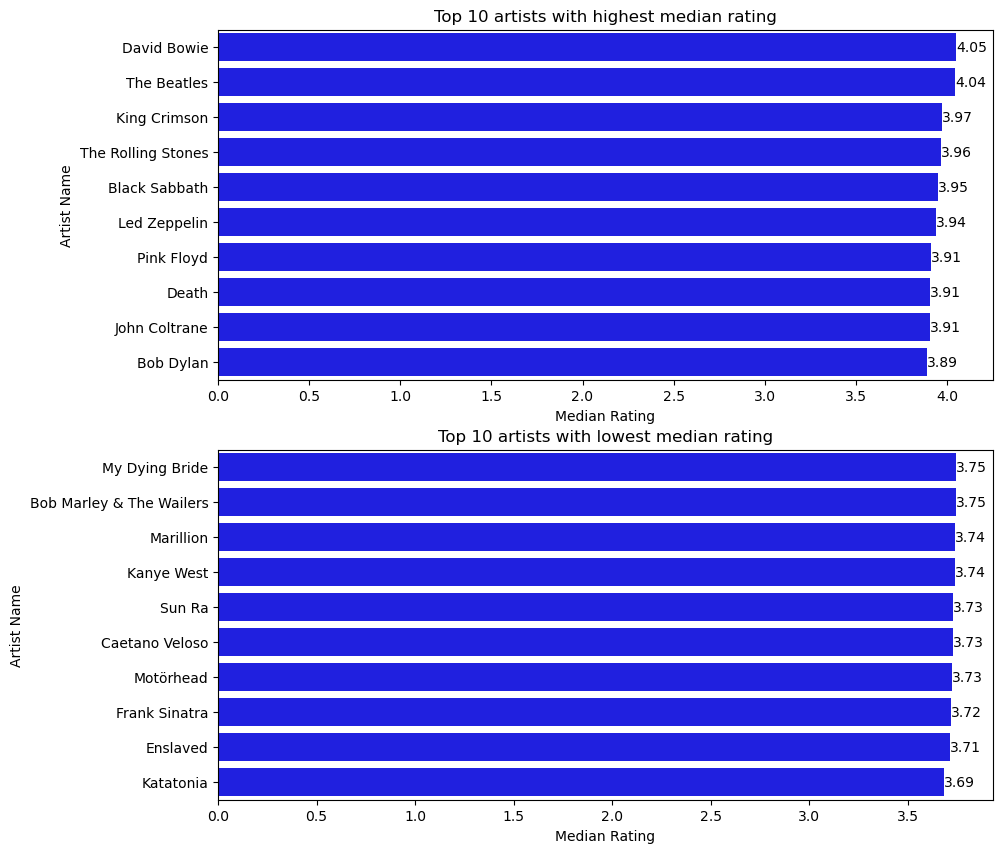

In [10]:
df2 = df.groupby('Artist Name')['Average Rating'].agg(['median'])
df2 = df2[df['Artist Name'].value_counts() > 5].reset_index()
df2 = df2.sort_values(by='median', ascending=False)

# plot

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))
plt.subplot(211)
ax1 = sns.barplot(y='Artist Name', x='median', data=df2.head(10), color='blue')
ax1.bar_label(ax1.containers[0], fmt='%.2f', label_type='edge')
plt.xlabel('Median Rating')
plt.ylabel('Artist Name')
plt.title('Top 10 artists with highest median rating')

plt.subplot(212)
ax2 = sns.barplot(y='Artist Name', x='median', data=df2.tail(10), color='blue')
ax2.bar_label(ax2.containers[0], fmt='%.2f', label_type='edge')
plt.xlabel('Median Rating')
plt.ylabel('Artist Name')
plt.title('Top 10 artists with lowest median rating')

plt.show()

## * Zadanie 3 - bonusowe (1 pkt)

Zapisz wygenerowaną figurę do formatu `.pgf` i załącz w raporcie wygenerowanym w `LaTeX` tak, by na wykresie zawierał się klikalny link do strony `www.rateyourmusic.com` (np. w tytule) - można zrobić to ręcznie, edytując zapisany plik `.pgf`. Przykład w katalogu z pracą domową w pliku `pgf_example.pdf` (klikalny tytuł i elementy legendy).  

Załącz w rozwiązaniu wygenerowany plik `pdf`. 